<a href="https://colab.research.google.com/github/srinivasanibmbangalore/OpenCVDeepLearningCertification/blob/master/Sobel_Laplacian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Laplacian Operator is also a derivative operator which is used to find edges in an image. The major difference between Laplacian and other operators like Prewitt, Sobel, Robinson and Kirsch is that these all are first order derivative masks but Laplacian is a second order derivative mask. 

In [3]:
import argparse
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ml_data/OpenCVCertification/images'
imgPath=root_path+"/sudoku.png"



matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
img = cv2.imread(imgPath,1)
if (img.any() == None):
  print("Empty Image")

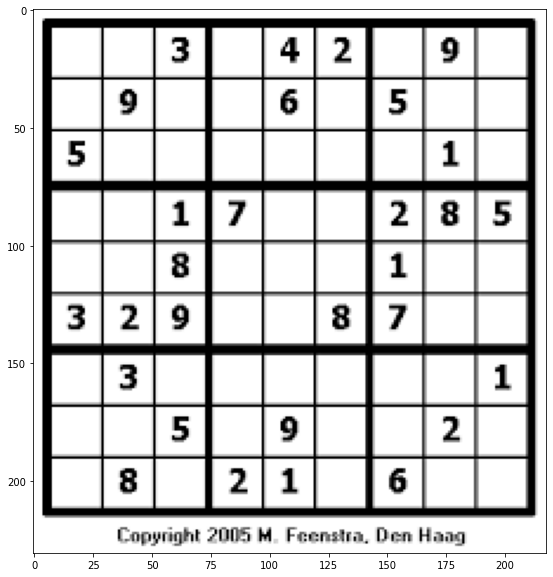

In [6]:
plt.imshow(img)



The derivative of a matrix is calculated by an operator called the Laplacian, in honor of Laplace, a famous mathematician.

 \Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2} 

Unfortunately the partial derivatives can not be solved analytically but must be treated with the numerical calculation using approximations. So if you want to calculate a Laplacian, you will need to calculate first two derivatives, called derivatives of Sobal, each of which takes into account the gradient variations in a certain direction: one horizontal, the other vertical.

horizontal derivative of Sobal (Sobal x). Is obtained through the convolution * The image with a matrix  G_ {x}  kernel call always odd sizes. The simplest case, the one with the size 3 kernel is the following case:

Horizontal Sobal derivative (Sobal x). It is obtained through the convolution  * of the image I with a matrix  G_{x} called kernel which has always odd size. The kernel with size 3 is the simplest case:

 G_{x} = \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix} * I 

Vertical Sobal derivative (Sobal y). It is obtained through the convolution * of the image I with a matrix $latex G_{y} $ called kernel which has always odd size. The kernel with size 3 is the simplest case:

 G_{y} = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix} * I 

So in the end to get the Laplacian (approximation) you will need to combine the two previous results

 G = \sqrt{ G_{x}^{2} + G_{y}^{2} } 

although sometimes you’d prefer to also simplify this equation:

 G = |G_{x}| + |G_{y}| 

The lower the size of the kernel, the greater the approximation with which you’ll get the results. But at the same time the larger the size of the kernel the greater the required calculation.

In [26]:
#Remove noise by blurring with a Gaussian filter
img = cv2.GaussianBlur(img, (3, 3), 0)

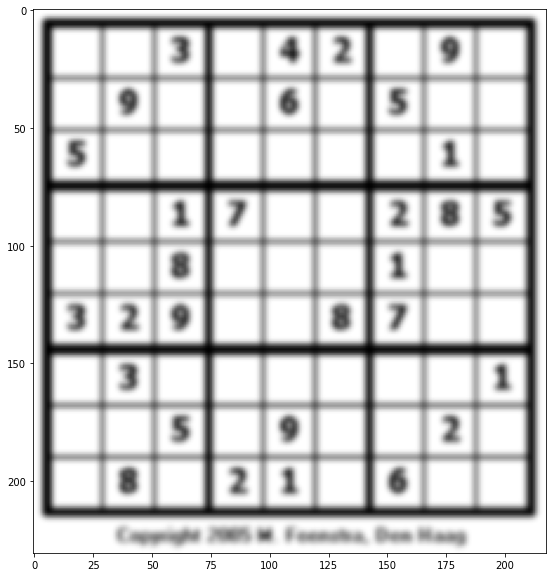

In [27]:
bkgrndImg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(bkgrndImg)

In [28]:
sobelx = cv2.Sobel(bkgrndImg,cv2.CV_64F,1,0,ksize=3) ### This will show the Vertical Edges
sobely = cv2.Sobel(bkgrndImg,cv2.CV_64F,0,1,ksize=3) ### This will show the Horizontal Edges

Text(0.5, 1.0, 'Sobel Y')

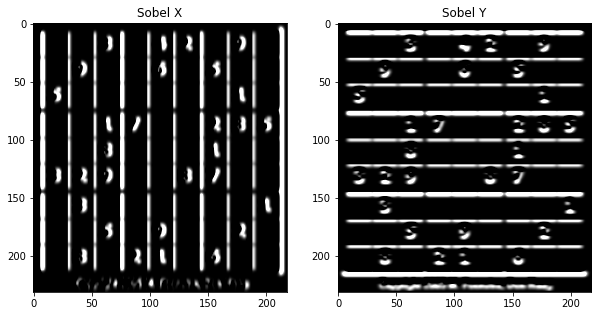

In [29]:
#Display images
plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(sobelx,vmin=0, vmax=255)
ax.set_title("Sobel X")
#ax.axis('off')


ax = plt.subplot(1,2,2)
plt.imshow(sobely,vmin=0, vmax=255)
ax.set_title("Sobel Y")
#ax.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


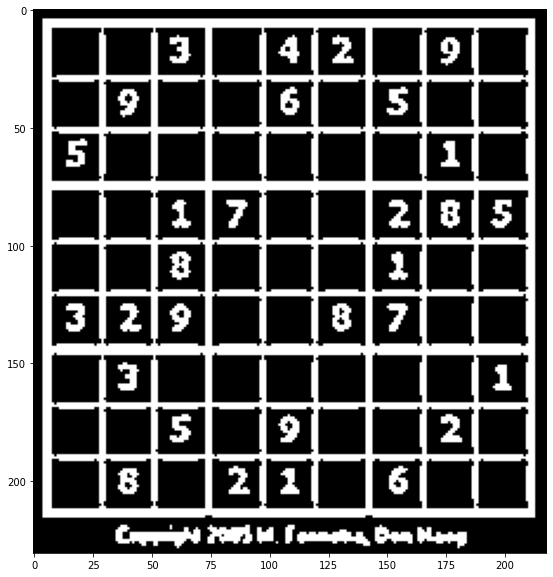

In [30]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(laplacian)

In fact, there was a problem while converting data. The gradients reported in the gray scale with cv2.CV_64F values are represented by positive values (positive slope) when changing from black to white. While they are represented by negative values (negative slope) when switching from white to black. In the conversion from cv2.CV_64F to cv2.CV_8U, all negative slopes are reduced to 0, and then the information relating to those edges are lost. When the program will display the image, the edges from white to black will not be represented.

To overcome this, you should keep the data in the output of the filter in cv2.CV_64F (instead cv2.CV_8U), then calculate the absolute value, and finally do the conversion in cv2.CV_8U.

In [31]:
laplacian8 = np.uint8(np.absolute(laplacian))
sobelx8 = np.uint8(np.absolute(sobelx))
sobely8 = np.uint8(np.absolute(sobely))

Text(0.5, 1.0, 'Sobel Y8')

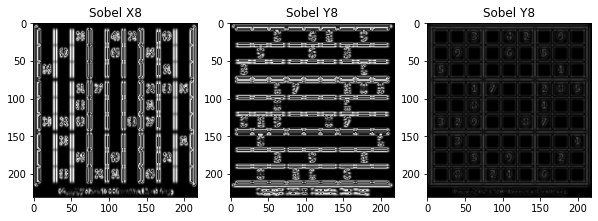

In [32]:
#Display images
plt.figure()

ax = plt.subplot(1,3,1)
plt.imshow(sobelx8,vmin=0, vmax=255)
ax.set_title("Sobel X8")
#ax.axis('off')


ax = plt.subplot(1,3,2)
plt.imshow(sobely8,vmin=0, vmax=255)
ax.set_title("Sobel Y8")

ax = plt.subplot(1,3,3)
plt.imshow(laplacian8,vmin=0, vmax=255)
ax.set_title("Sobel Y8")

#ax.axis('off')